In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import os
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from mpl_toolkits.mplot3d import Axes3D
import missingno as msno


# OGRENCI & MEZUN PROFILI ANALIZI

In [5]:
df_mez_orj=pd.read_csv('mezun-ogrenci_profili.csv')
del df_mez_orj['Unnamed: 0']
df_mez_orj.columns=['ISIM','BILGI','CINSIYET','ACIKLAMA','UNVAN','FIRMA','LINK']
df_mez=df_mez_orj.copy()
df_mez_orj[:15]


,ISIM,BILGI,CINSIYET,ACIKLAMA,UNVAN,FIRMA,LINK
0,Cenk Akarsu,Software Engineer II - Microsoft,1,Installing the infrastructure of the Trakya Un...,Software Engineer,Microsoft,https://ie.linkedin.com/in/cenkakarsu/en-us
1,Murat AKKAŞ,Senior Software Development Specialist - LOGO...,1,Univera Computer Systems AS. Trakya Üniversite...,Software Developer,LOGO,https://se.linkedin.com/in/murat-akka%2525C5%2...
2,Şener Göçer,Founder & CEO - GCR GROUP,1,Image for Trakya Üniversitesi. Trakya Üniversi...,Founder & CEO,GCR GROUP,https://www.linkedin.com/in/%25C5%259Fener-g%2...
3,Hakan Güldal,Dr. Öğr. Üyesi - Trakya University,1,Trakya UniversityTrakya Üniversitesi. Edirne ....,Dr. Öğr. Üyesi,Trakya University,https://tr.linkedin.com/in/hguldal
4,Şener Göçer,Founder & CEO - GCR GROUP,1,Trakya Üniversitesi. Doctor of Philosophy (PhD...,Founder & CEO,GCR GROUP,https://www.linkedin.com/in/%25C5%259Fener-g%2...
5,Tuğba Akbaşaran Yılmaz,Software Developer - Travix International ...,0,Trakya Üniversitesi. Bachelor of Engineering (...,Software Developer,Travix International ...,https://nl.linkedin.com/in/tobetuuba
6,Alperen Kapusuz,"Trakya Üniversitesi - Pendik, İstanbul, Türki...",1,Computer Engineering Student at Trakya Univers...,Trakya Üniversitesi,,https://tr.linkedin.com/in/alperen-kapusuz-a72...
7,Uzay Durdu,Computer Science Student - Trakya Üniversites...,1,Trakya ÜniversitesiTrakya Üniversitesi. İstanb...,Computer Science Student,,https://tr.linkedin.com/in/uzay-durdu-6b88911a2
8,Cihad Küçük,"Istanbul, Turkey",1,"TU IoT and Deep Learning Community, Co-Founder...","Istanbul, Turkey",NaN,https://tr.linkedin.com/in/cihadkck/en-us
9,Ufuk can KAHRAMAN,"Trakya University - Bağcılar, İstanbul ...",1,"Ufuk can KAHRAMAN | Bağcılar, İstanbul, Türkiy...",Trakya University,,https://tr.linkedin.com/in/ufuk-can-kahraman-6...


In [6]:
df_mez_orj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 7 columns):
ISIM        291 non-null object
BILGI       291 non-null object
CINSIYET    291 non-null int64
ACIKLAMA    291 non-null object
UNVAN       291 non-null object
FIRMA       149 non-null object
LINK        291 non-null object
dtypes: int64(1), object(6)
memory usage: 16.0+ KB


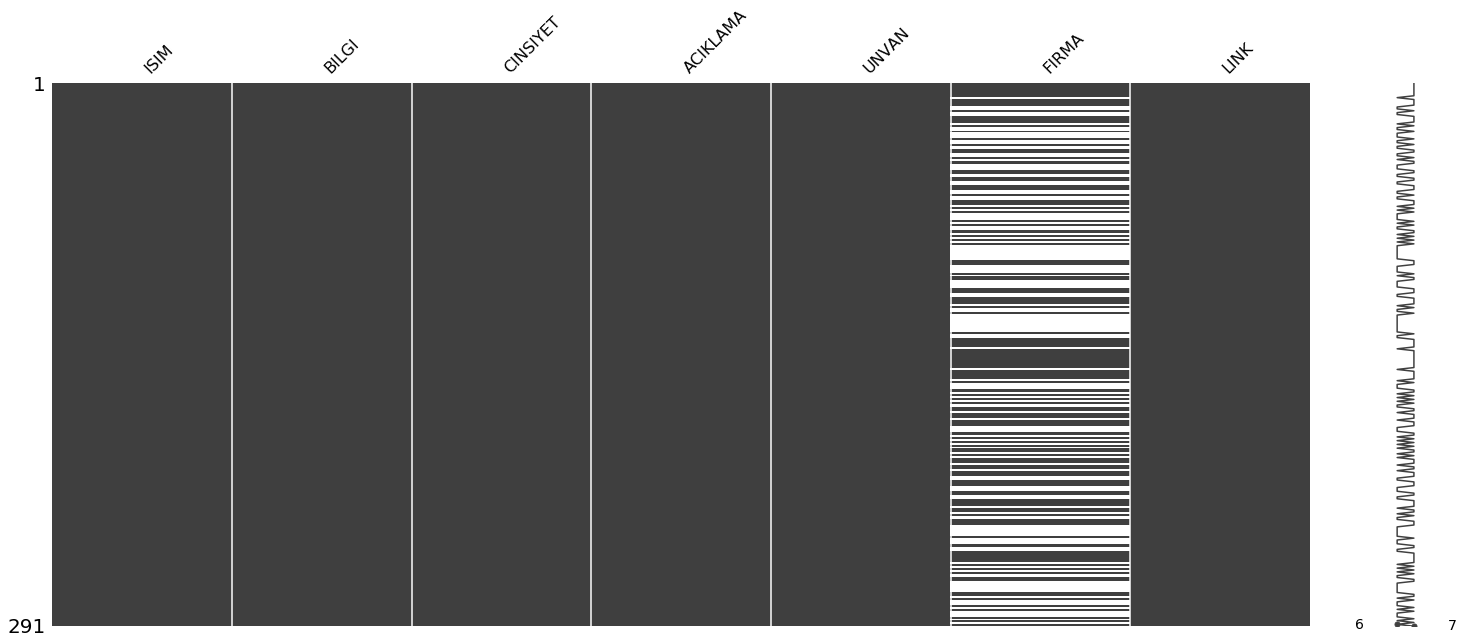

In [7]:
msno.matrix(df_mez);

In [8]:
df_mez[df_mez['FIRMA'].notnull()].filter(['UNVAN','FIRMA'])['UNVAN'].value_counts()[:]

 Software Developer                   26
 Software Engineer                    20
 Business Analyst                      5
 Intern                                5
 Software Test Engineer                5
 Java Developer                        2
 Mobile Application Developer          2
 Software Executive                    2
 API Engineer                          2
 SAP Basis Consultant                  2
 Co-Founder                            2
 Computer Engineer                     2
 Founder & CEO                         2
 BİLGİSAYAR MÜHENDİSİ                  1
 Machine Learning Engineer             1
 ECM Consulting Manager                1
 System and Network Specialist         1
 Application Management                1
 Development Software Engineer         1
 MS in Computer Engineering            1
 Yazılım Uzmanı                        1
 WIE koordinasyon üyesi                1
 Biescom Bilgisayar                    1
 Intern                                1
 M.Sc. in Comput

In [9]:
df_mez[df_mez['FIRMA'].notnull()].filter(['UNVAN','FIRMA'])['FIRMA'].value_counts()[:]

 Akbank                             6
 Ronwell Digital                    4
                                    4
 Yapı Kredi                         4
 Accenture                          3
 VakıfBank                          3
 LOGO                               2
 Nebula Bilişim                     2
 Etiya                              2
 NETAŞ                              2
 Cigna Finans                       2
 AppyThings                         2
 GCR GROUP                          2
 SENTEZ GRUP                        2
 Softtech                           2
 PAYNET ÖDEME                       2
 Mutlubiev                          2
 Trakya University                  2
 BOTAS                              2
 Trendyol Group                     2
 Microsoft                          2
 Travix International               2
 Planet Group International         2
 Technoperia                        2
 Huawei                             1
 DDI Teknoloji                      1
 BTC Bilişim

# PROFIL

In [10]:
liste_acik=df_mez.ACIKLAMA

liste_aciklama=','.join(liste_acik)
liste_aciklama[:4000]

"Installing the infrastructure of the Trakya University Computer Engineering department Virtual ... Trakya Üniversitesi Bilgisayar Mühendisliği Mezunları. -. ASP.,Univera Computer Systems AS. Trakya Üniversitesi ... Trakya Üniversitesi. 3, Computer Engineering ... Ahmet Keskin. Ege Üniversitesi Bilgisayar Mühendisliği \xa0...,Image for Trakya Üniversitesi. Trakya Üniversitesi. Doctor of Philosophy (PhD), ... Trakya Üniversitesi. Doctor of Philosophy (PhD), Computer Engineering.,Trakya UniversityTrakya Üniversitesi. Edirne ... He completed his master's and doctoral studies in Computer Engineering department of the same university.,Trakya Üniversitesi. Doctor of Philosophy (PhD)Information Technology ... Trakya Üniversitesi. Doctor of Philosophy (PhD)Computer Engineering. 2002 - 2006\xa0...,Trakya Üniversitesi. Bachelor of Engineering (B.E.)Computer Engineering ... Trakya Üniversitesi Bilgisayar Mühendisliği Öğrencileri ve Mezunları. -. Tuğba.,Computer Engineering Student at Trakya Unive

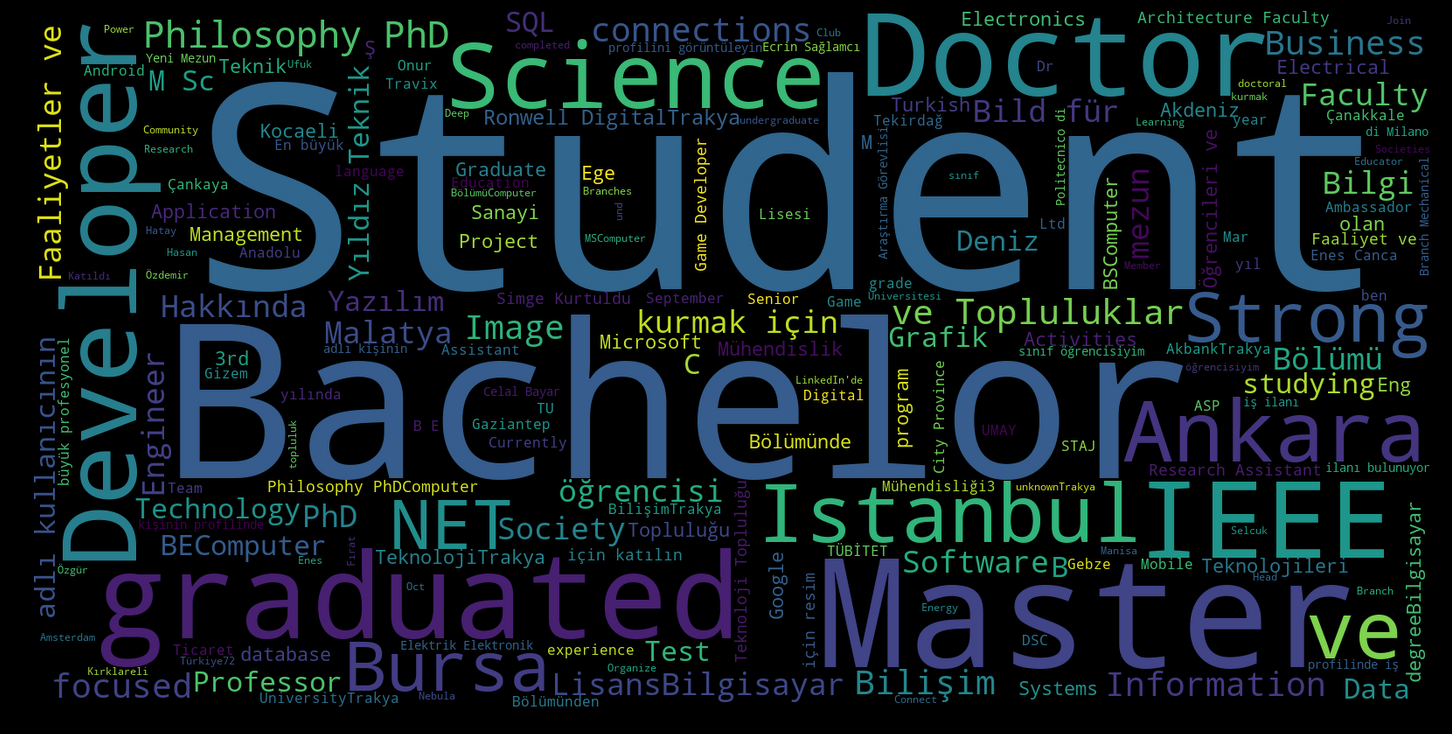

In [11]:
stopwords = set(STOPWORDS)
stopwords.update(["Computer", "University", "Trakya", "Mühendisliği", "Üniversitesi",'Engineering','Installing','Mezunları',
                  'Bilgisayar','Türkiye','İstanbul','bağlantı','Edirne',"Lisans","Derecesi","DerecesiBilgisayar","eğitim","kurumunda",
                 "şu","okulda","Turkey","Department","degreeComputer","Engineering3","öğrenci","Türkiye500","kurmak için",'degree','Yüksek',
                  'professional',"Engineering2","şirketinde"])


text = liste_aciklama
wordcloud = WordCloud(width=1600, height=800,stopwords=stopwords,background_color="black").generate(text)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud,interpolation='Lanczos')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


# CALISILAN KURUM

In [13]:
liste_company=df_mez.FIRMA
liste_company=liste_company.dropna()
liste_company=','.join(liste_company)
liste_company

' Microsoft, LOGO, GCR GROUP, Trakya University, GCR GROUP, Travix International ..., , , , Nebula Bilişim, , UCXtech, Yorunge Iletisim …, Borda Technology, KoçSistem, Özgür Yazılım A.Ş, Trakya University, Technoperia, Universum ..., HST Global, Travix International, 4Cast ..., Technoperia, Codevist Teknoloji, PAYNET ÖDEME HİZMETLERİ, Trakya Agricultural Research, Oxolo, IEEE TU, RE/MAX Türkiye, Business Systems, GDG Edirne, Everis, Genbil, Accenture, Sanction Scanner, Akademedya Yazılım, Amazon, Netas, Microsoft, Etiya, Bilgi İşlem Daire Başkanlığı, Cukurova Development , Xena Vision, Ithinka , Cigna Finans, Kuveyt Türk Katılım Bankası, Ziraat Teknoloji A.Ş, Accenture, AppyThings, Etiya, Akbank, Mutlubiev, VakıfBank, Netsparker, TesterYou, Cigna Finans, Microsoft , GfK, PAYNET ÖDEME,Anadolu Sigorta, Trius Bilişim Teknolojileri, Akbank, Firefly, VakıfBank, Innovance, Ronwell Digital, LOGO Yazılım, Token, LOGO, Mutlubiev, İnnova Bilişim, Saudi Arabian, Entropitek, Planet Group Internati

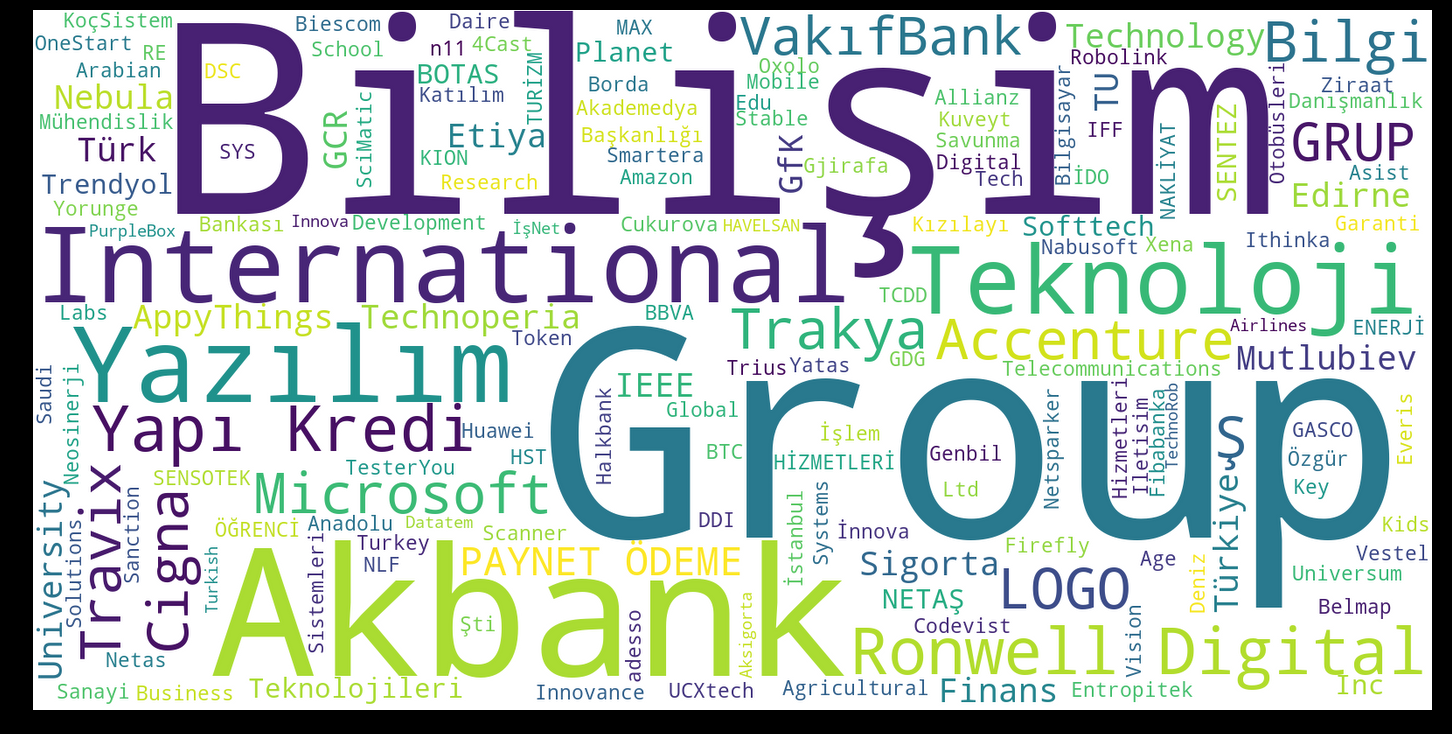

In [14]:
liste_company=df_mez.FIRMA
liste_company=liste_company.dropna()
liste_company=','.join(liste_company)

stopwords = set(STOPWORDS)
stopwords.update(["asd"])


text = liste_company
wordcloud = WordCloud(width=1600, height=800,stopwords=stopwords,background_color="white").generate(text)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud,interpolation='Lanczos')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# CALISILAN KONUM 

In [15]:
liste_title=df_mez.UNVAN

liste_title=','.join(liste_title)
liste_title[:1000]


' Software Engineer , Software Developer  , Founder & CEO, Dr. Öğr. Üyesi, Founder & CEO, Software Developer, Trakya Üniversitesi , Computer Science Student , Istanbul, Turkey, Trakya University, Intern, Trakya Üniversitesi, Software Engineer, Trakya Üniversitesi, Trakya Üniversitesi, System and Network Specialist, İstanbul, Türkiye, Schweiz, Intern , Software Developer, Intern, Assist.Prof.Dr., Greater Dublin, Intern, Trakya University, Trakya Üniversitesi, Assistant Professor, Trakya Üniversitesi, Business Integration Services, Trakya Üniversitesi, Full Stack Developer, Trakya Üniversitesi, Microsoft Turkey Student Ambassador, Software Developer, Johnstown, Pennsylvania Area, Trakya University, Software Developer, Software Engineer, Trakya Üniversitesi, Trakya Üniversitesi, Founder, Student Representative Coordination Team, Software Developer, Computer Engineer, Trakya University, Trakya Üniversitesi, Edirne, Turkey, Machine Learning Engineer, Administrative Board Member, Software En

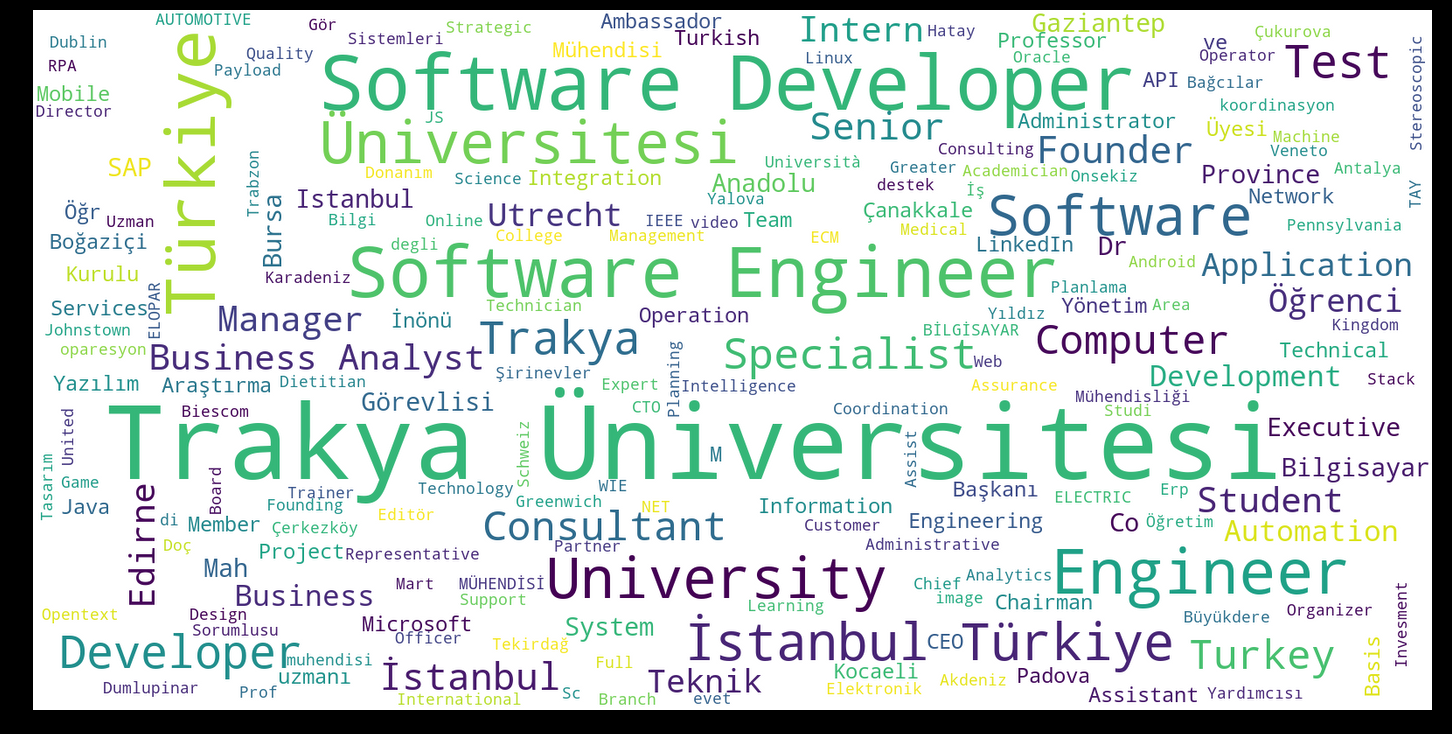

In [16]:

stopwords = set(STOPWORDS)
stopwords.update(["asd"])


text = liste_title
wordcloud = WordCloud(width=1600, height=800,stopwords=stopwords,background_color="white").generate(text)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud,interpolation='Lanczos')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()